### Historical CNN model

### LeNet model

In [53]:
import time
import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import DataLoader, Subset
import torchvision
from torchvision import models
from torchvision import transforms
from torchvision.models.vgg import VGG11_Weights

%load_ext autoreload 
%autoreload 2
import utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,),std=(0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data/mnist_data', train=True, download=True, transform=transform)

<img src="./rsc/LeNet.png" width="600" height="800">

LeNet architecture as published in [original paper](https://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) by LeCun et al. 1998.


In [20]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1,padding=0)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1,padding=0)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.max_pool2d(F.relu(self.conv1(X)),2)
        X = F.max_pool2d(F.relu(self.conv2(X)),2)
        X = self.flatten(X)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))

        return X

In [21]:
lenet = LeNet()
lenet

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [22]:
x= torch.randn((128,1,32,32))
out = lenet(x)

In [23]:
out.shape

torch.Size([128, 10])

### Available models in Pytorch

>The torchvision.models subpackage contains definitions of models for addressing different tasks, including: image classification, pixelwise semantic segmentation, object detection, instance segmentation, person keypoint detection, video classification, and optical flow.
>
[Models in pytorch](https://pytorch.org/vision/0.16/models.html)

### Use a VGG model in pytorch

In [26]:
model = models.vgg11(weights=VGG11_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /root/.cache/torch/hub/checkpoints/vgg11-8a719046.pth
100%|██████████| 507M/507M [00:41<00:00, 12.7MB/s] 


In [27]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
 

[CIFAR10](https://pytorchaorg/tutorials/beginner/blitz/cifar10_tutorial.html) dataset <br>

>It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

In [56]:
transform = transforms.Compose([
    transforms.ToTensor(),
    # transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
    # actual mean/std values are calculated from the actual CIFAR-10 dataset
    transforms.Normalize(mean=(0.4914,0.4822,0.4465), std=(0.2023,0.1994,0.2010)) 
])
classes = ('plane', 'car', 'bird', 'cat','deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')
train_dataset=torchvision.datasets.CIFAR10(root="./data/cifar10_data", train=True, download=True,transform=transform)
val_dataset=torchvision.datasets.CIFAR10(root="./data/cifar10_data", train=False, download=True,transform=transform)

# train_dataset 50K images
# use subset 
train_dataset_sub = Subset(train_dataset, range(1000))
val_dataset_sub = Subset(val_dataset, range(500))

batch_size=32
train_loader = DataLoader(train_dataset_sub, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset_sub, batch_size=batch_size, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


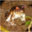

In [38]:
im, label = train_dataset[0]
im

In [41]:
label, classes[label]

(6, 'frog')

In [43]:
X_train, y_train = next(iter(train_loader))
X_train.shape

torch.Size([32, 3, 32, 32])

In [44]:
y_train

tensor([2, 5, 6, 0, 3, 1, 7, 2, 6, 7, 1, 4, 2, 2, 3, 4, 3, 9, 1, 7, 7, 0, 1, 5,
        0, 0, 6, 3, 5, 5, 7, 1])

In [45]:
opt = optim.SGD(model.parameters(), lr=0.03)

In [46]:
out = model(X_train)
out.shape

torch.Size([32, 1000])

In [47]:
model.classifier[-1]

Linear(in_features=4096, out_features=1000, bias=True)

In [ ]:
# if you use GPU
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
# model.to(device)

Currently, the number of output features is 1000. You need to change this classifier to 10 classes.

In [48]:
model.classifier[-1] = nn.Linear(4096, 10)

In [49]:
out = model(X_train)
out.shape

torch.Size([32, 10])

In [57]:
start = time.time()
train_losses, val_losses, val_accuracies = utils.learn(model, train_loader, val_loader, opt, F.cross_entropy, num_epoch=3)
end = time.time()
print(f'Time to complete {end - start:.2f} seconds')

epoch: 0: train error: 0.9726948123425245, validation error: 1.6468564346432686, validation accuracy: 0.5144531242549419


epoch: 1: train error: 0.5757191590964794, validation error: 0.9803864434361458, validation accuracy: 0.6476562507450581


epoch: 2: train error: 0.38066741777583957, validation error: 1.0013910122215748, validation accuracy: 0.6714843735098839
Time to complete 34.54 seconds
